# Files to Focus On
business.json: Contains business details, including categories and attributes.<br>
review.json: Includes user reviews and ratings.<br>
checkin.json: Provides check-in data indicating business popularity over time.

In [19]:
import pandas as pd
import json

# Load User data
with open('yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    user_data = [json.loads(line) for line in f]
user_df = pd.DataFrame(user_data)

# Load Tip data
with open('yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    tip_data = [json.loads(line) for line in f]
tip_df = pd.DataFrame(tip_data)

# Load business data
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = [json.loads(line) for line in f]
business_df = pd.DataFrame(business_data)

# Load review data
with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    review_data = [json.loads(line) for line in f]
review_df = pd.DataFrame(review_data)

# Load check-in data
with open('yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    checkin_data = [json.loads(line) for line in f]
checkin_df = pd.DataFrame(checkin_data)


In [20]:
# Display data samples and summary info with break lines
def explore_and_clean(df, df_name):
    print(f"Exploring {df_name} DataFrame")
    print("-" * 50)
    
    # DataFrame info
    print("Info:")
    print(df.info())
    print("\n" + "-" * 50)
    
    # Summary statistics for numeric columns
    print("Summary statistics:")
    print(df.describe())
    print("\n" + "-" * 50)
    
    # Check for missing values
    print("Missing values:")
    print(df.isnull().sum())
    print("\n" + "=" * 50)
    
    # Drop rows with missing values and confirm
    df_cleaned = df.dropna()
    print(f"After removing rows with missing values, {df_name} has {df_cleaned.shape[0]} rows remaining.")
    print("\n" + "=" * 50)
    
    return df_cleaned

# Explore and clean each DataFrame
user_df_clean = explore_and_clean(user_df, "User")
tip_df_clean = explore_and_clean(tip_df, "Tip")
business_df_clean = explore_and_clean(business_df, "Business")
review_df_clean = explore_and_clean(review_df, "Review")
checkin_df_clean = explore_and_clean(checkin_df, "Check-in")


Exploring Business DataFrame
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: f

# Users

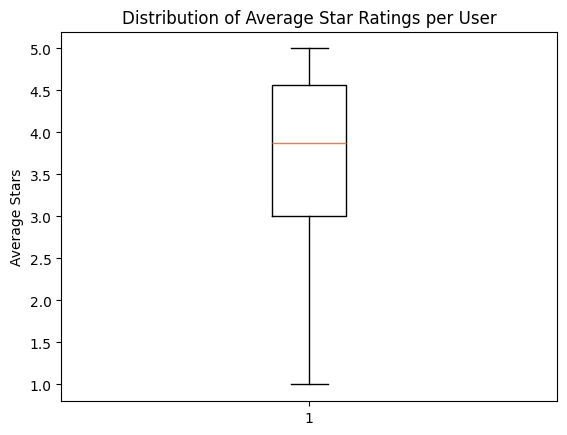

In [25]:
import matplotlib.pyplot as plt

# Boxplot of average star ratings
plt.boxplot(user_df['average_stars'])
plt.title('Distribution of Average Star Ratings per User')
plt.ylabel('Average Stars')
plt.show()



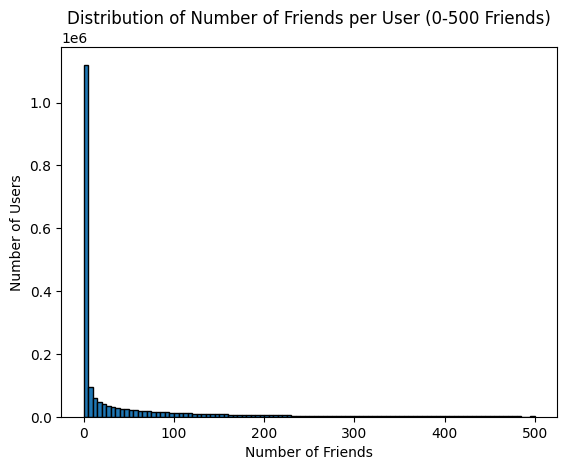

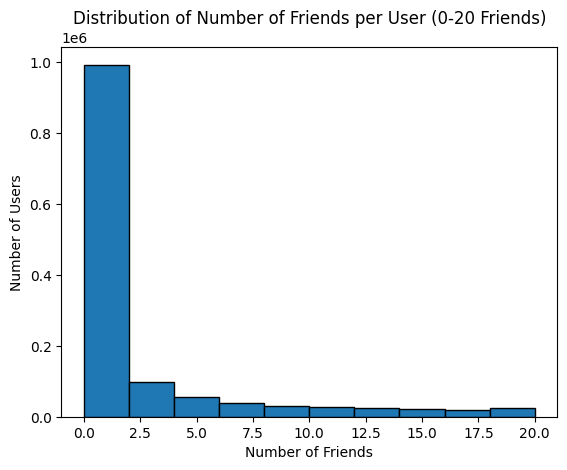

In [48]:
# Calculate number of friends per user
import numpy as np
user_df['num_friends'] = user_df['friends'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Plot distribution of friends
# Limit x-axis for friends count distribution
plt.hist(user_df['num_friends'], bins=100, edgecolor='k', range=(0, 500))
plt.title('Distribution of Number of Friends per User (0-500 Friends)')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.show()

# Limit x-axis to 100
plt.hist(user_df['num_friends'], bins=10, edgecolor='k', range=(0, 20))
plt.title('Distribution of Number of Friends per User (0-20 Friends)')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.show()

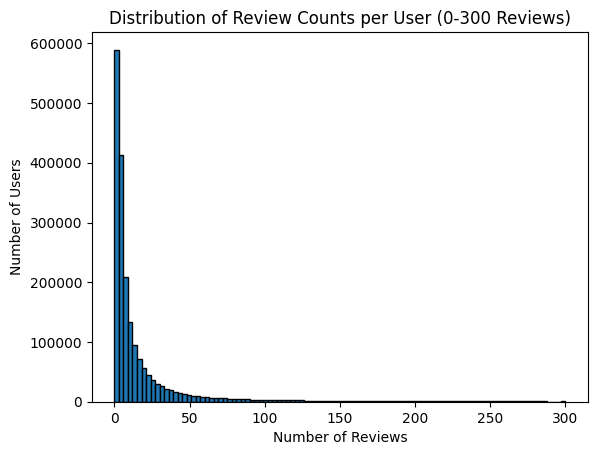

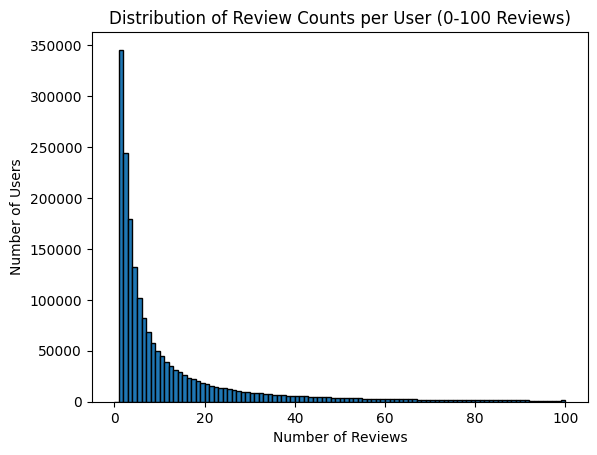

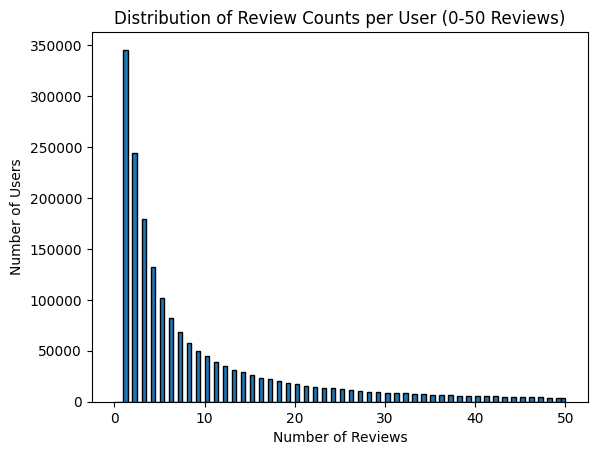

In [50]:
import matplotlib.pyplot as plt

# Plot distribution of review counts
# Limit x-axis for review count distribution
plt.hist(user_df['review_count'], bins=100, edgecolor='k', range=(0, 300))
plt.title('Distribution of Review Counts per User (0-300 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

# Limit x-axis to 100
plt.hist(user_df['review_count'], bins=100, edgecolor='k', range=(0, 100))
plt.title('Distribution of Review Counts per User (0-100 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

# Limit x-axis to 50
plt.hist(user_df['review_count'], bins=100, edgecolor='k', range=(0, 50))
plt.title('Distribution of Review Counts per User (0-50 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

# Checkin.json

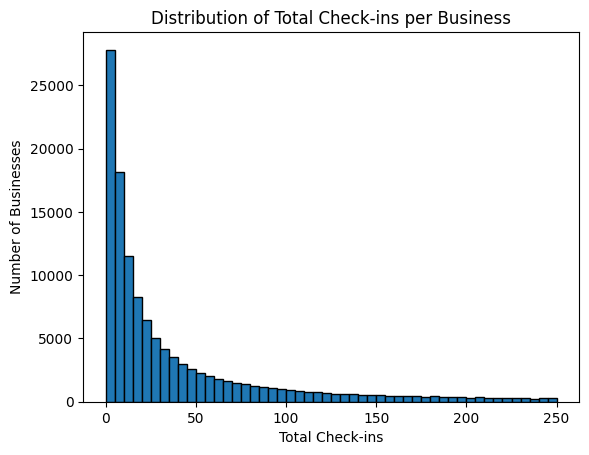

In [78]:
# Calculate total check-ins per business by counting the number of dates
checkin_df['total_checkins'] = checkin_df['date'].apply(lambda x: len(x.split(', ')) if pd.notnull(x) else 0)

# Plot distribution of total check-ins
import matplotlib.pyplot as plt
plt.hist(checkin_df['total_checkins'], bins=50, edgecolor='k', range=(0, 250))
plt.title('Distribution of Total Check-ins per Business')
plt.xlabel('Total Check-ins')
plt.ylabel('Number of Businesses')
plt.show()



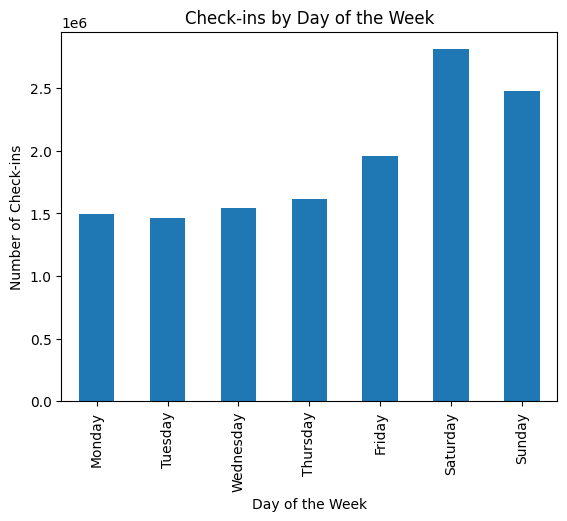

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Expand date column into individual check-in dates
checkin_df['date'] = checkin_df['date'].fillna('')  # Handle missing values
checkin_df_exploded = checkin_df.assign(date=checkin_df['date'].str.split(', ')).explode('date')

# Strip whitespace and convert to datetime
checkin_df_exploded['date'] = pd.to_datetime(checkin_df_exploded['date'].str.strip(), errors='coerce')

# Drop any rows where date conversion failed (if needed)
checkin_df_exploded = checkin_df_exploded.dropna(subset=['date'])

# Extract the day of the week and count check-ins
checkin_df_exploded['day_of_week'] = checkin_df_exploded['date'].dt.day_name()
day_counts = checkin_df_exploded['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot check-ins by day of the week
day_counts.plot(kind='bar')
plt.title('Check-ins by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Check-ins')
plt.show()

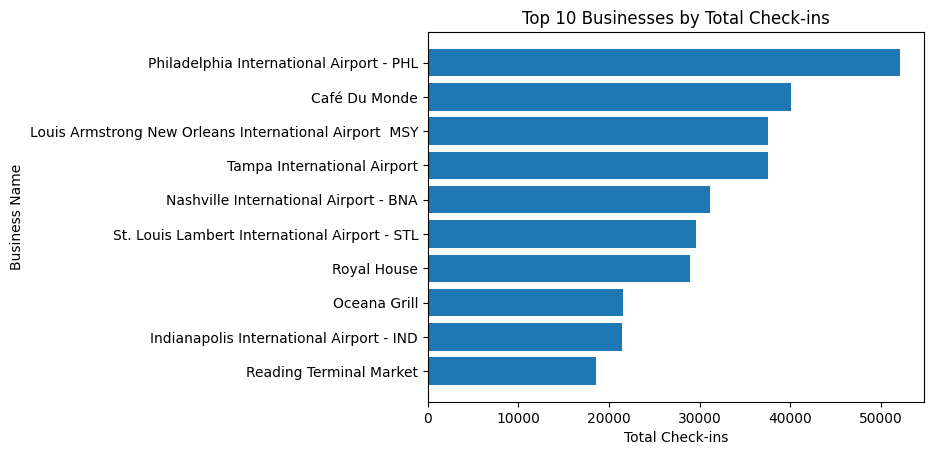

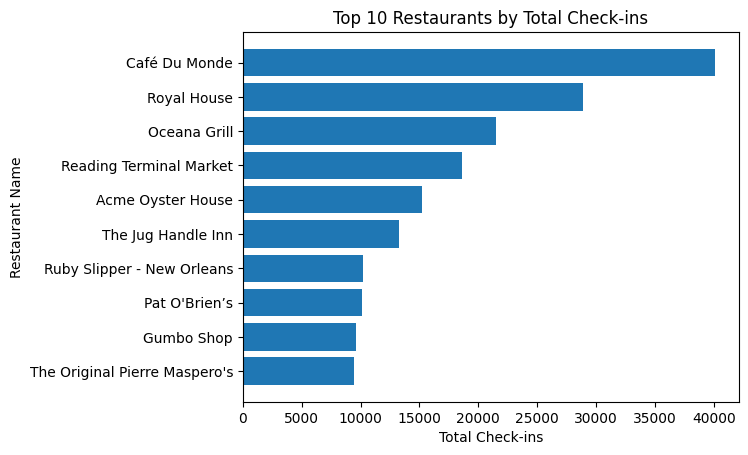

In [66]:
# Merge checkin_df with business_df on 'business_id'
merged_df = checkin_df.merge(business_df[['business_id', 'name']], on='business_id', how='left')

# Top 10 businesses by total check-ins
top_businesses = merged_df.sort_values(by='total_checkins', ascending=False).head(10)

# Plot with business names instead of IDs
import matplotlib.pyplot as plt

plt.barh(top_businesses['name'], top_businesses['total_checkins'])
plt.title('Top 10 Businesses by Total Check-ins')
plt.xlabel('Total Check-ins')
plt.ylabel('Business Name')
plt.gca().invert_yaxis()
plt.show()

# Filter for restaurants only (excluding airports)
restaurant_businesses = business_df[business_df['categories'].str.contains('Restaurant', case=False, na=False)]
non_airport_restaurants = restaurant_businesses[~restaurant_businesses['categories'].str.contains('Airport', case=False, na=False)]

# Merge the filtered businesses with checkin data
restaurant_checkins = checkin_df.merge(non_airport_restaurants[['business_id', 'name']], on='business_id', how='inner')

# Get the top 10 restaurants by total check-ins
top_restaurants = restaurant_checkins.sort_values(by='total_checkins', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.barh(top_restaurants['name'], top_restaurants['total_checkins'])
plt.title('Top 10 Restaurants by Total Check-ins')
plt.xlabel('Total Check-ins')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()
plt.show()


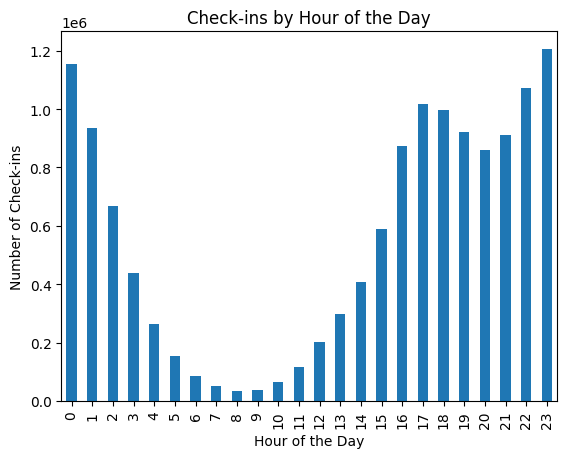

In [64]:
# Extract hour from the date column if it includes time
checkin_df_exploded['hour'] = checkin_df_exploded['date'].dt.hour
hourly_counts = checkin_df_exploded['hour'].value_counts().sort_index()

# Plot check-ins by hour
hourly_counts.plot(kind='bar')
plt.title('Check-ins by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.show()
